In [8]:
# Importing modules
import pandas as pd
import numpy as np
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow import keras
#######################
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from keras.models import Sequential, save_model, load_model
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.regularizers import l2
%matplotlib inline

# Data Preprocessing
1. Data Normalization
    1. "Normalized Power" contains normalized values using default sklearn parameters
    2. "NNormalied Power" contains normalized values using custom normalization range [0-320].
    3. Load Normalization
    4. Belt Tension Normalization

In [9]:
df= pd.read_csv("traningData_349.csv")

In [10]:
df.describe()

,RMS Current (A),RMS Voltage (V),Load Alias,%Belt Tension,Power (W),%Power/Nominal_Power,Normalized_Power,Normalized_Belt_Tension,Normalized_Load,Class_3,Class_4,Class_9,NNNormalized_Power,Load,Load1
count,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000
mean,2.244258,239.086049,6.597938,79.479052,249.911384,25.464795,0.395264,0.835517,0.439925,2.159903,2.740952,7.472911,0.299114,1.772318,1.604738
std,0.133051,1.576013,4.953935,18.555136,15.004988,1.507339,0.220939,0.194638,0.330031,0.623588,1.010374,1.690149,0.150050,1.128014,0.488961
min,0.536000,236.398000,0.000000,0.000000,223.000000,23.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.030000,0.000000,1.000000
25%,2.160000,237.286500,2.000000,75.000000,240.000000,24.000000,0.250000,0.790000,0.130000,2.000000,2.000000,7.000000,0.200000,1.000000,1.000000
50%,2.178000,239.969000,6.000000,85.000000,244.000000,25.000000,0.310000,0.890000,0.400000,2.000000,3.000000,8.000000,0.240000,2.000000,2.000000
75%,2.372000,240.456000,11.000000,95.000000,266.000000,27.000000,0.630000,1.000000,0.730000,3.000000,4.000000,9.000000,0.460000,3.000000,2.000000
max,2.618000,241.591000,15.000000,95.000000,291.000000,30.000000,1.000000,1.000000,1.000000,3.000000,4.000000,9.000000,0.710000,4.000000,2.000000


# Data Normalization

In [ ]:
# #Saving Scalar for real-time usage
# import joblib

# scaler_filename =[ "Power-scaler.save","pallet-scaler.save","custom-Power-scaler.save"]
# data_frame = [ df[['Power (W)']],df[['Load Alias']],df[['Power (W)']] ]
# for data,name in zip(data_frame,scaler_filename): 

#     if name=="custom-Power-scaler.save":
#         scaler = MinMaxScaler()
#         x_sample = [220, 320]
#         scaler.fit(np.array(x_sample)[:, np.newaxis])
#         #scaler.fit(data)
#         joblib.dump(scaler, name) 
#         print('If: ',scaler.data_max_,scaler.data_min_)
#     else:
#         scaler = MinMaxScaler()
#         scaler.fit(data)
#         joblib.dump(scaler, name) 
#         #scaler = joblib.load(name)
#         print(scaler.data_max_,scaler.data_min_)


# scaler = MinMaxScaler()
# df['Normalized_Power']=scaler.fit_transform(df[['Power (W)']])
# df['Normalized_Belt_Tension']=scaler.fit_transform(df[['%Belt Tension']])
# df['Normalized_Load']=scaler.fit_transform(df[['Load Alias']])

# df['Normalized_Power']=round(df['Normalized_Power'],2)
# df['Normalized_Belt_Tension']=round(df['Normalized_Belt_Tension'],2)
# df['Normalized_Load']=round(df['Normalized_Load'],2)

## Coustomize Power(W)  and Belt Tension scaling.
# scaler = MinMaxScaler()
# x_sample = [220, 320]
# scaler.fit(np.array(x_sample)[:, np.newaxis])
# #df['NNNormalized_Power']= scaler.fit_transform(df[['Power (W)']])
# df['NNNormalized_Power']=scaler.transform(df[['Power (W)']])
# df['NNNormalized_Power']=round(df['NNNormalized_Power'],2)


#df['NNormalized_Power']= round((df[['Power (W)']]-df[['Power (W)']].min())/(320-df[['Power (W)']].min()),2)
#df.to_csv('s_Measurements10.csv',index=False)


#print(np.allclose(df['NNNormalized_Power'], df['NNormalized_Power']))
#print(scaler.data_max_,scaler.data_min_)

In [ ]:
# from sklearn.preprocessing import QuantileTransformer
# qt = QuantileTransformer(n_quantiles=1000, random_state=0)

# df['Qt-Normalized_Power1']=qt.fit_transform(df[['Power (W)']])
# df['Qt-Normalized_Power1']=round(df['Qt-Normalized_Power1'],4)

# df['Qt-Normalized_Load']=qt.fit_transform(df[['Load Alias']])
# df['Qt-Normalized_Load']=round(df['Qt-Normalized_Load'],4)

#df.to_csv('s_Measurements10.csv',index=False)
# b=scaler.transform(np.array([226], ndmin=2))
# a
# b
# print(a.ndim,b.ndim,np.append(a,b))

In [ ]:
df_min= df['Normalized_Power']
df_cus= df['NNNormalized_Power']
df_qt= df['Qt-Normalized_Power']
df_qt1= df['Qt-Normalized_Power1']

In [ ]:
plt.figure(figsize =(10.0,7.0))
plt.style.use('fivethirtyeight')
#plt.plot(df_min,label='min')
# plt.plot(df_qt,label='qt')
# plt.plot(df_cus,label='cus')
#plt.plot(df_qt1,label='qt1')
plt.plot(df_cus, marker='o', linestyle='none', markersize=5,label='qt1',markerfacecolor='none',color='k')
plt.plot(df_qt, marker='+', linestyle='none', markersize=5,label='min',markerfacecolor='none',color='r')
plt.xticks(np.arange(0,5000,500))
plt.yticks(np.arange(0, 1.05,0.05))
plt.legend()

In [ ]:
# qt = QuantileTransformer(n_quantiles=1000, random_state=0)

# df['Qt-log']=qt.fit_transform(np.log(df[['Power (W)']]))
# df['Qt-log']=round(df['Qt-log'],4)
# from sklearn.preprocessing import RobustScaler
# transformer = RobustScaler().fit(df[['Power (W)']])
# df['robust']=transformer.transform(df[['Power (W)']])
# df['robust']=round(df['robust'],4)
# df.to_csv('s_Measurements10.csv',index=False)
# pd.read_csv('s_Measurements10.csv')
# df_min= df['Normalized_Power']
# df_cus= df['NNNormalized_Power']
# df_qt= df['Qt-Normalized_Power']
# df_qt1= df['Qt-Normalized_Power1']
# df_qtlog=df['Qt-log']
df_robust=df['robust']
plt.plot(df_robust, marker='o', linestyle='none', markersize=5,label='robust',markerfacecolor='none',color='k')
plt.plot(df_qt, marker='+', linestyle='none', markersize=5,label='qt',markerfacecolor='none',color='r')
plt.legend()

# Data Class Labeling based on Belt Tension

This data is collected for conveyor belt tension ranging from 0% to 95%, there are 9 different belt tensions values in this range. In the data there are three different belt tension class label columns:
### 1. Class_3:
1. All Not Usefull Belt tensions are combined in a Class
2. Moderate and Useful(Optimal), belt tensions are combined in a sperate class
3. Over Tense belt Tension has a huge power consumption margin among other belt tensions so it has its own class
Please see the following table:
## Class_3

| Belt Tension Class | %Belt Tension | Description|
|:--------------------|:-------------|:------------|
|1 | 0 | Not Useful
|1 | 15 | Not Useful
|1 | 30 | Not Useful
|1 | 45 | Not Useful
|1 | 60 | Not Useful
|1 | 70 | Not Useful
|2 | 75 | Moderate Useful
|2 | 85 | Useful (Optimal)
|3 | 95 | Over Tense

### 2. Class_4:
1. All Not Usefull Belt tensions are combined in a class
2. Moderate and Useful(Optimal), belt tensions have  sperate classes
3. Over Tense belt Tension has a huge power consumption margin among other belt tensions so it has its own class
Please see the following table:

## Class_4

| Belt Tension Class | %Belt Tension | Description|
|:--------------------|:-------------|:------------|
|1 | 0 | Not Useful
|1 | 15 | Not Useful
|1 | 30 | Not Useful
|1 | 45 | Not Useful
|1 | 60 | Not Useful
|1 | 70 | Not Useful
|2 | 75 | Moderate Useful
|3 | 85 | Useful (Optimal)
|4 | 95 | Over Tense

### 3. Class_9
1. Default, Each belt tension has its own class

Please see the following table:
## Class_9

| Belt Tension Class | %Belt Tension | Description|
|:--------------------|:-------------|:------------|
|1 | 0 | Not Useful
|2 | 15 | Not Useful
|3 | 30 | Not Useful
|4 | 45 | Not Useful
|5 | 60 | Not Useful
|6 | 70 | Not Useful
|7 | 75 | Moderate Useful
|8 | 85 | Useful (Optimal)
|9 | 95 | Over Tense

The belt tension predictor's accuracy significantly effected by the belt tension class labeling. Please the follwing picture.

In the picture each box plot shoes the power consumption of conveyory belt with all zone combinations for a specific belt tension.
#### Observations:

1. The belt tension range: 0%-60% are not useful for us as with these belt tensions the ius no motion in the conveyor belt and data mean is approximately same (0-30 and 45-60) for these combinations.
2. The belt tension 70% is also not useful though this belt tension creates motion in the the belt but as soon as ther is a pallet on zone1 the jerky motion starts.
3. For there belt tensions the data is collected only for 0 (for 0%-70%) and 1 (only for 70%) load combinations.
4. The belt tension predictor mostly mispredict the belt tension class in that range so by grouping them in one class
has huge affect on predictor accuracy also ant tension value which is less than or equal to 70% is not useful for our production system.
5. Similarly, for belt tensions 75% and 85% the margin between the belt power consumption for different load combinations is very small and for some load combinations the power consumption values overlaps with each other, though the belt tension is different. These belt tensions are grouped under one class, please see class_3 tabel. More detailed analysis of these belt tension can be found in **Main CNV Static Data Analysis** file. 

## Labeling Belt tension into Class

In [ ]:
# choices=[1,2,3,4,5,6,7,8,9] #[1,1,1,1,1,1,1,2,3,4],[1,1,1,1,1,1,1,2,2,3]
# conditions= [
#             df['%Belt Tension'].eq(0),df['%Belt Tension'].eq(15),df['%Belt Tension'].eq(30),
#             df['%Belt Tension'].eq(45),df['%Belt Tension'].eq(60),df['%Belt Tension'].eq(70),
#             df['%Belt Tension'].eq(75),df['%Belt Tension'].eq(85),df['%Belt Tension'].eq(95)
#             ]
# df['Class9'] = np.select(conditions, choices, default= df['%Belt Tension'])

# df.to_csv('s_Measurements10.csv',index=False)
# df= pd.read_csv("s_Measurements10.csv")


In [4]:
choices=[0,1,1,1,1,
         2,2,2,2,2,2,
         3,3,3,3,
        4] #[1,1,1,1,1,1,1,2,3,4],[1,1,1,1,1,1,1,2,2,3]
conditions= [
            df['Load Alias'].eq(0),
            df['Load Alias'].eq(1),df['Load Alias'].eq(2),df['Load Alias'].eq(4),df['Load Alias'].eq(8),

            df['Load Alias'].eq(3),df['Load Alias'].eq(5),df['Load Alias'].eq(6),df['Load Alias'].eq(9),
            df['Load Alias'].eq(10),df['Load Alias'].eq(12),

            df['Load Alias'].eq(7),df['Load Alias'].eq(11),
            df['Load Alias'].eq(13),df['Load Alias'].eq(14),
    
            df['Load Alias'].eq(15)
            ]
df['load'] = np.select(conditions, choices, default= df['Load Alias'])

df.to_csv('s_Measurements10.csv',index=False)
df= pd.read_csv("s_Measurements10.csv")

## One Hot Encoding (Learning Block)

In [5]:
# class_encoder = LabelBinarizer()
# class_encoder.fit(df['Class_9'])
# transformed = class_encoder.transform(df['Class_9'])
# oneHot_df = pd.DataFrame(transformed)
# df= pd.concat([df, oneHot_df], axis=1).drop(['Class'], axis=1)
# class_labels = np.argmax(class_prob, axis=1)

# Splitting Data for Traning, Cross Validation and Testing

In [25]:
# Randomly selecting "n" records for testing
def select_random(df,num):
      # for random indices
    index = np.random.choice(df.shape[0], num, replace=False) 
    df_500= df.iloc[index]
    #df.drop(index,inplace=True)
    df_500.to_csv('testData_349.csv',index=False)
    df.to_csv('traningData_349.csv',index=False)
    
# function Call
# df= pd.read_csv("s_Measurements10.csv")
# select_random(df,500)

# NN Model

# Helper Functions

### Plot Loss and Accuracy

In [11]:
def plot_accuracy(history_dict,i):
    
    plt.style.use('fivethirtyeight')
    plt.rcParams['figure.figsize'] = (10.0, 7.0)
    
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']

    epochs = range(1, len(acc_values) + 1)

    plt.plot(epochs, acc_values, 'bo', label="Training Accuracy")
    plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

    plt.title(f'Training and Validation Accuraccy_{i}')
    plt.yticks(np.arange(0,1.2,0.1))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f'T_V_Validation_{i}.png',bbox_inches='tight')

    plt.show()
    
    
def plot_loss(history_dict,i):
    
    plt.style.use('fivethirtyeight')
    plt.rcParams['figure.figsize'] = (10.0, 7.0)
    
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(loss_values) + 1)
    plt.rcParams['figure.figsize'] = (10.0, 7.0)
    plt.plot(epochs, loss_values, 'ro', label="Training Loss")
    plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
    plt.yticks(np.arange(0,1.2,0.1))
    plt.title(f'Training and Validation Loss_{i}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss Value')
    plt.legend()
    plt.savefig(f'T_V_Loss_{i}.png',bbox_inches='tight')

    plt.show()

### Train/Test split

In [14]:
def train_test(df,features,T_class=3):
    
    if T_class == 9:
        one_hot_encode = to_categorical(df['Class_9'])

    elif T_class ==4:
        one_hot_encode = to_categorical(df['Class_4'])
        print('HERERRR\n',one_hot_encode)
    
    elif T_class ==3:
        one_hot_encode = to_categorical(df['Class_3'])
        print('HERERRR\n',one_hot_encode)

    else:
        print(f'Wrong class value.....\nAllowed Classes are {3,4,9}!')
        
        return {"TT_split":f'Wrong class value.....\nAllowed Classes are {3,4,9}!'}

    X=np.array(df[features])
    #type(X)
    X_train, X_test, y_train, y_test = train_test_split(X,one_hot_encode, test_size=0.33, random_state=42)

    X_train= np.array(X_train)
    X_test= np.array(X_test)

    print(f'{type(X_train)} ,{X_train.shape}, {type(X_train)} , {X_test.shape}')
    print(f'{type(y_train)} ,{y_train.shape}, {type(y_train)},{y_test.shape}')

    return {"TT_split":( X_train, X_test, y_train, y_test)}



### Model development and compilation

In [15]:
def NN_model(model_architecture=[10,10,10,10]):
    
    #build model
    model = Sequential()
    model.add(Dense(model_architecture[0], input_dim=2, activation='relu',kernel_regularizer=l2(0.01)))
    model.add(Dense(model_architecture[1], activation='relu',kernel_regularizer=l2(0.01)))
    model.add(Dense(model_architecture[2], activation='relu',kernel_regularizer=l2(0.01)))
    model.add(Dense(model_architecture[3], activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

### Fit Model

In [16]:
def fit_model(model,split,i,epocs=100):
    
    X_train, X_test, y_train, y_test= split.get("TT_split")
    # fit model
    history = model.fit(X_train,
                   y_train,
                   epochs=epocs,
                   batch_size=10,
                   validation_data=(X_test, y_test))
    
    model.save(f'M_iter3_{i}.h5') #using h5 extension
    return history

### Belt Tension Evaluation and Prediction for unseen test data (500 samples)

In [25]:
def prdict_Tension_class(model,i,features,T_class=4):
    
    df_test= pd.read_csv('testData_349.csv')
    nn=np.random.randint(500, size=100)

    X_Test= np.array(df_test[features])
    
    if T_class == 9:

        y_Test=np.array(to_categorical(df_test[f'Class_{T_class}']))
        results = model.evaluate(X_Test, y_Test)
        
        #class prediction
        pred = model.predict(X_Test[nn]) 
        pred = np.argmax(pred, axis = 1)
        True_label = np.argmax(y_Test[nn],axis = 1)
        accuracy_score( True_label,pred )
        load = df_test['Load Alias'][nn] #(X_Test[nn][:,1]*16).astype(int)
        
        power = df_test['Power (W)'][nn]
        tem_df=df_test.loc[nn,['Load Alias','Power (W)','%Belt Tension',f'Class_{T_class}']]
        tem_df['Pred_BT_Class'] = pred

        tem_df.to_csv(f'pred{T_class}_{i}.csv',index=False)

        return (T_class,results[0],results[1],pred,True_label,load,power)
        
    elif T_class == 4:
        
        y_Test=np.array(to_categorical(df_test[f'Class_{T_class}']))
        results = model.evaluate(X_Test, y_Test)
        
        #class prediction
        pred = model.predict(X_Test[nn]) 
        pred = np.argmax(pred, axis = 1)
        True_label = np.argmax(y_Test[nn],axis = 1)
        accuracy_score( True_label,pred )
        
        load = df_test['Load Alias'][nn]
        power = df_test['Power (W)'][nn]
        
        tem_df=df_test.loc[nn,['Load Alias','Power (W)','%Belt Tension',f'Class_{T_class}']]
        tem_df['Pred_BT_Class'] = pred

        tem_df.to_csv(f'pred{T_class}_{i}.csv',index=False)
        
        return (T_class,results[0],results[1],pred,True_label,load,power)
        
    elif T_class == 3:
        
        y_Test=np.array(to_categorical(df_test[f'Class_{T_class}']))
        results = model.evaluate(X_Test, y_Test)
        
        #class prediction
        pred = model.predict(X_Test[nn]) 
        pred = np.argmax(pred, axis = 1)
        True_label = np.argmax(y_Test[nn],axis = 1)
        accuracy_score( True_label,pred )
        
        load = df_test['Load Alias'][nn]
        power = df_test['Power (W)'][nn]
        
        tem_df=df_test.loc[nn,['Load Alias','Power (W)','%Belt Tension',f'Class_{T_class}']]
        tem_df['Pred_BT_Class'] = pred

        tem_df.to_csv(f'pred{T_class}_{i}.csv',index=False)
        
        return (T_class,results[0],results[1],pred,True_label,load,power)
    
    else:

        return f'Wrong class value.....Allowed Classes are {3,4,9}!'

## Main Block: All Functions are called in this block

Splitting data 1.

HERERRR
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
<class 'numpy.ndarray'> ,(3054, 2), <class 'numpy.ndarray'> , (1505, 2)
<class 'numpy.ndarray'> ,(3054, 4), <class 'numpy.ndarray'>,(1505, 4)
Epoch 1/150
306/306 [==============================] - 2s 4ms/step - loss: 1.1805 - accuracy: 0.5828 - val_loss: 1.0283 - val_accuracy: 0.5894
Epoch 2/150
306/306 [==============================] - 1s 2ms/step - loss: 0.9867 - accuracy: 0.5838 - val_loss: 0.9532 - val_accuracy: 0.5894
Epoch 3/150
306/306 [==============================] - 1s 2ms/step - loss: 0.9398 - accuracy: 0.5838 - val_loss: 0.9234 - val_accuracy: 0.5894
Epoch 4/150
306/306 [==============================] - 1s 2ms/step - loss: 0.9156 - accuracy: 0.5884 - val_loss: 0.9017 - val_accuracy: 0.6505
Epoch 5/150
306/306 [==============================] - 1s 2ms/step - loss: 0.8934 - accuracy: 0.6873 - val_loss: 0.8777 - val_accuracy: 0.7063
Epoch 6/150
306/306

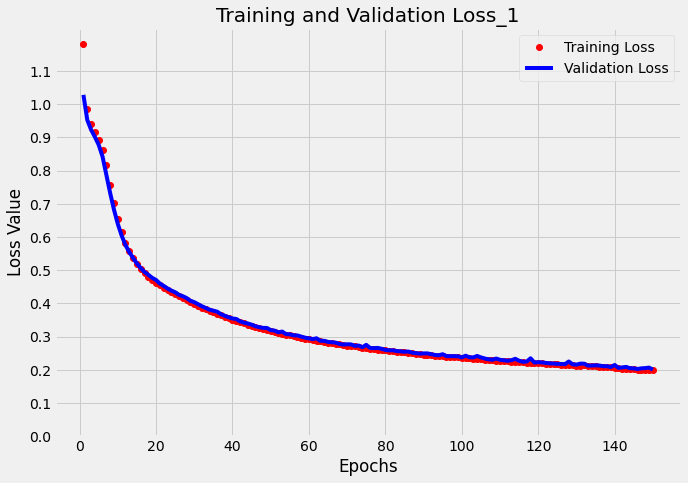

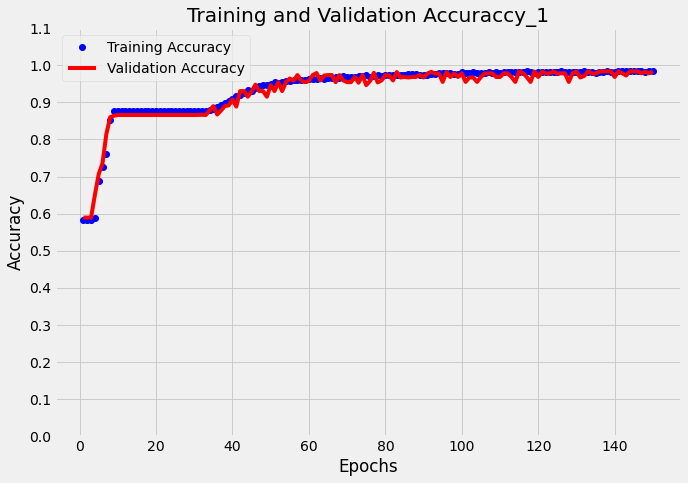

16/16 [==============================] - 0s 1ms/step - loss: 0.1963 - accuracy: 0.9880
Splitting data 2.

HERERRR
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
<class 'numpy.ndarray'> ,(3054, 2), <class 'numpy.ndarray'> , (1505, 2)
<class 'numpy.ndarray'> ,(3054, 4), <class 'numpy.ndarray'>,(1505, 4)
Epoch 1/150
306/306 [==============================] - 1s 3ms/step - loss: 0.1984 - accuracy: 0.9856 - val_loss: 0.2045 - val_accuracy: 0.9801
Epoch 2/150
306/306 [==============================] - 1s 2ms/step - loss: 0.1987 - accuracy: 0.9836 - val_loss: 0.1999 - val_accuracy: 0.9834
Epoch 3/150
306/306 [==============================] - 1s 3ms/step - loss: 0.1976 - accuracy: 0.9840 - val_loss: 0.2086 - val_accuracy: 0.9721
Epoch 4/150
306/306 [==============================] - 1s 3ms/step - loss: 0.1968 - accuracy: 0.9826 - val_loss: 0.2043 - val_accuracy: 0.9721
Epoch 5/150
306/306 [==============================] - 1s 2ms/step - loss: 

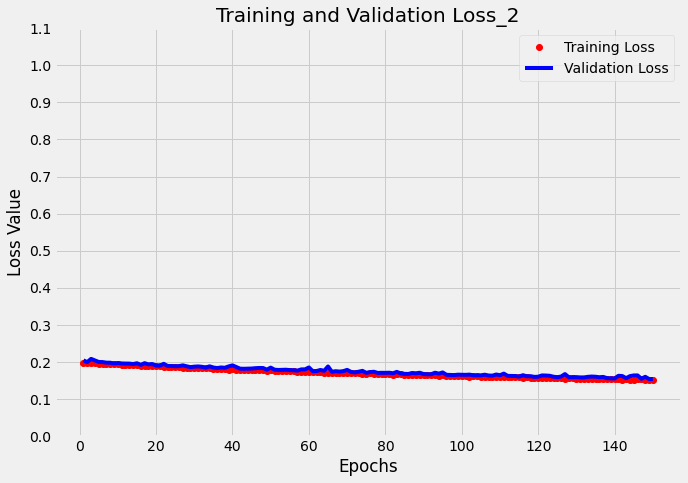

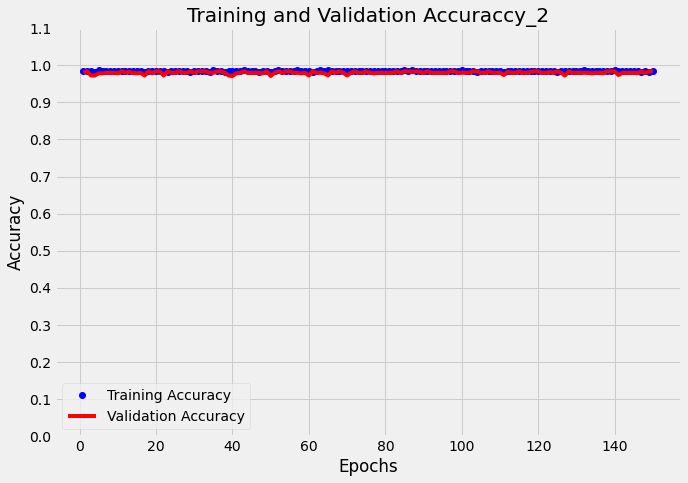

16/16 [==============================] - 0s 1ms/step - loss: 0.1508 - accuracy: 0.9880
Splitting data 3.

HERERRR
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
<class 'numpy.ndarray'> ,(3054, 2), <class 'numpy.ndarray'> , (1505, 2)
<class 'numpy.ndarray'> ,(3054, 4), <class 'numpy.ndarray'>,(1505, 4)
Epoch 1/150
306/306 [==============================] - 1s 3ms/step - loss: 0.1516 - accuracy: 0.9849 - val_loss: 0.1555 - val_accuracy: 0.9794
Epoch 2/150
306/306 [==============================] - 1s 4ms/step - loss: 0.1507 - accuracy: 0.9856 - val_loss: 0.1574 - val_accuracy: 0.9794
Epoch 3/150
306/306 [==============================] - 1s 3ms/step - loss: 0.1509 - accuracy: 0.9846 - val_loss: 0.1556 - val_accuracy: 0.9834
Epoch 4/150
306/306 [==============================] - 1s 3ms/step - loss: 0.1505 - accuracy: 0.9840 - val_loss: 0.1667 - val_accuracy: 0.9721
Epoch 5/150
306/306 [==============================] - 1s 2ms/step - loss: 

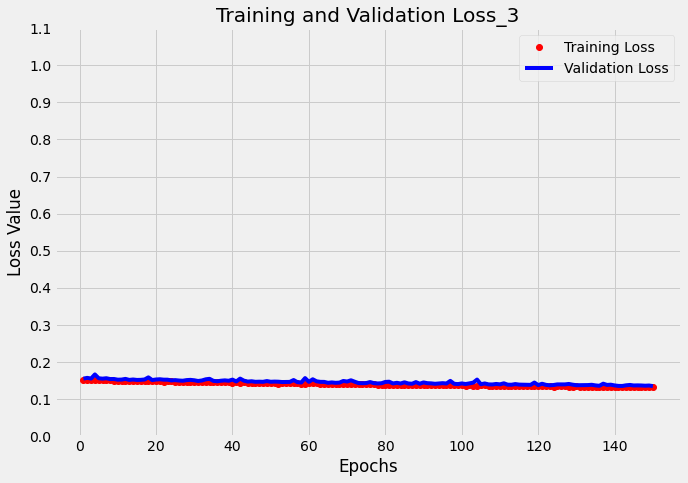

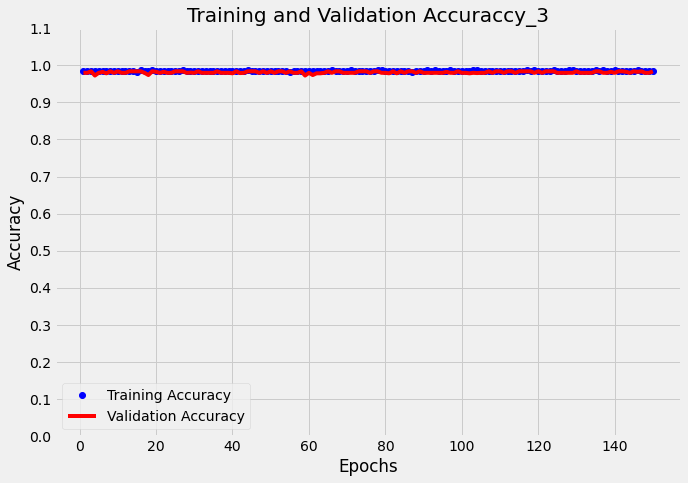

16/16 [==============================] - 0s 1ms/step - loss: 0.1307 - accuracy: 0.9880
Splitting data 4.

HERERRR
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
<class 'numpy.ndarray'> ,(3054, 2), <class 'numpy.ndarray'> , (1505, 2)
<class 'numpy.ndarray'> ,(3054, 4), <class 'numpy.ndarray'>,(1505, 4)
Epoch 1/150
306/306 [==============================] - 1s 2ms/step - loss: 0.1324 - accuracy: 0.9846 - val_loss: 0.1354 - val_accuracy: 0.9794
Epoch 2/150
306/306 [==============================] - 1s 3ms/step - loss: 0.1321 - accuracy: 0.9859 - val_loss: 0.1384 - val_accuracy: 0.9794
Epoch 3/150
306/306 [==============================] - 1s 4ms/step - loss: 0.1319 - accuracy: 0.9836 - val_loss: 0.1360 - val_accuracy: 0.9834
Epoch 4/150
306/306 [==============================] - 1s 4ms/step - loss: 0.1315 - accuracy: 0.9859 - val_loss: 0.1355 - val_accuracy: 0.9794
Epoch 5/150
306/306 [==============================] - 1s 2ms/step - loss: 

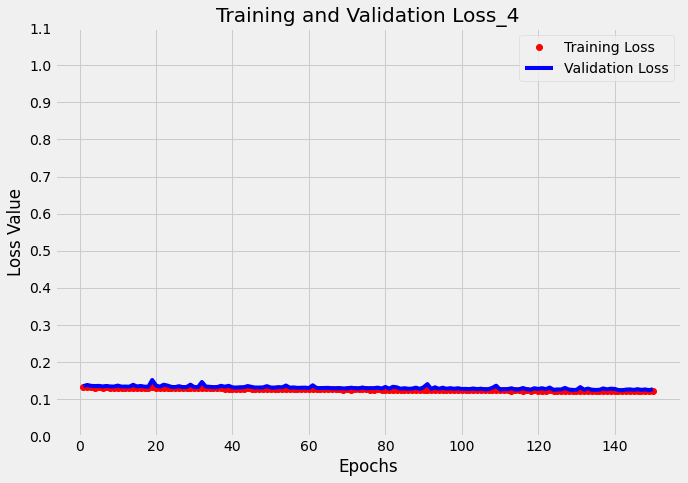

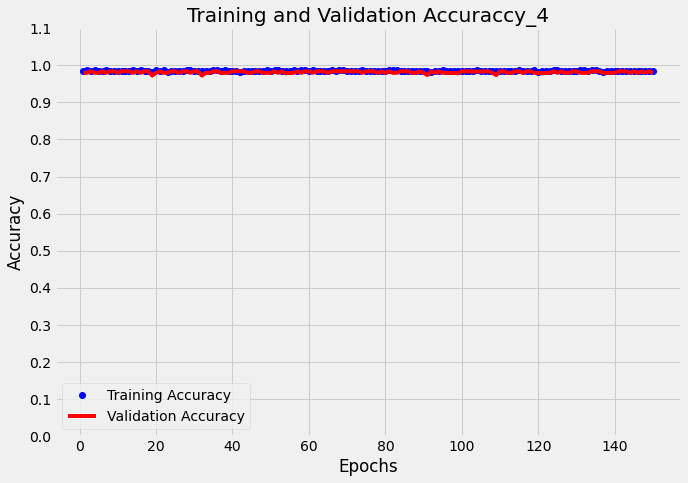

16/16 [==============================] - 0s 2ms/step - loss: 0.1200 - accuracy: 0.9820
Splitting data 5.

HERERRR
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
<class 'numpy.ndarray'> ,(3054, 2), <class 'numpy.ndarray'> , (1505, 2)
<class 'numpy.ndarray'> ,(3054, 4), <class 'numpy.ndarray'>,(1505, 4)
Epoch 1/150
306/306 [==============================] - 1s 2ms/step - loss: 0.1205 - accuracy: 0.9856 - val_loss: 0.1248 - val_accuracy: 0.9834
Epoch 2/150
306/306 [==============================] - 1s 3ms/step - loss: 0.1206 - accuracy: 0.9830 - val_loss: 0.1240 - val_accuracy: 0.9834
Epoch 3/150
306/306 [==============================] - 1s 4ms/step - loss: 0.1203 - accuracy: 0.9856 - val_loss: 0.1275 - val_accuracy: 0.9794
Epoch 4/150
306/306 [==============================] - 2s 5ms/step - loss: 0.1205 - accuracy: 0.9862 - val_loss: 0.1267 - val_accuracy: 0.9794
Epoch 5/150
306/306 [==============================] - 1s 3ms/step - loss: 

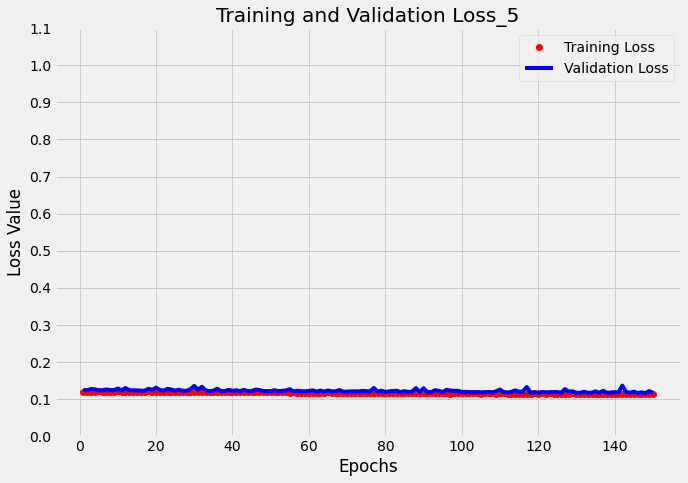

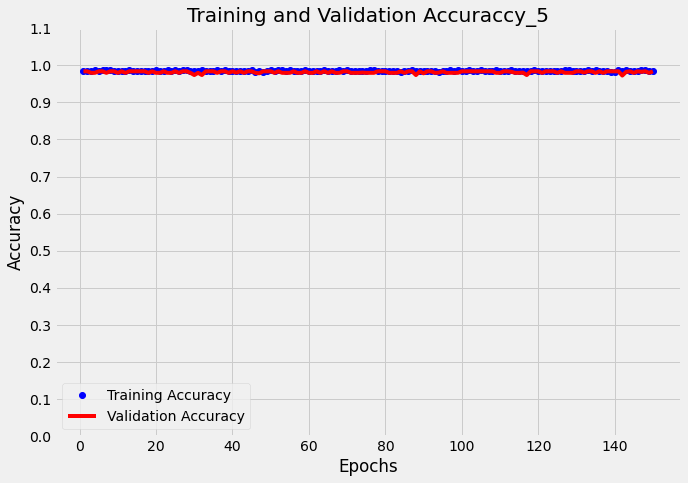

16/16 [==============================] - 0s 2ms/step - loss: 0.1136 - accuracy: 0.9880
Splitting data 6.

HERERRR
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
<class 'numpy.ndarray'> ,(3054, 2), <class 'numpy.ndarray'> , (1505, 2)
<class 'numpy.ndarray'> ,(3054, 4), <class 'numpy.ndarray'>,(1505, 4)
Epoch 1/150
306/306 [==============================] - 2s 6ms/step - loss: 0.1136 - accuracy: 0.9843 - val_loss: 0.1191 - val_accuracy: 0.9794
Epoch 2/150
306/306 [==============================] - 1s 4ms/step - loss: 0.1136 - accuracy: 0.9840 - val_loss: 0.1168 - val_accuracy: 0.9834
Epoch 3/150
306/306 [==============================] - 1s 3ms/step - loss: 0.1134 - accuracy: 0.9859 - val_loss: 0.1173 - val_accuracy: 0.9834
Epoch 4/150
306/306 [==============================] - 2s 5ms/step - loss: 0.1134 - accuracy: 0.9856 - val_loss: 0.1238 - val_accuracy: 0.9794
Epoch 5/150
306/306 [==============================] - 1s 3ms/step - loss: 

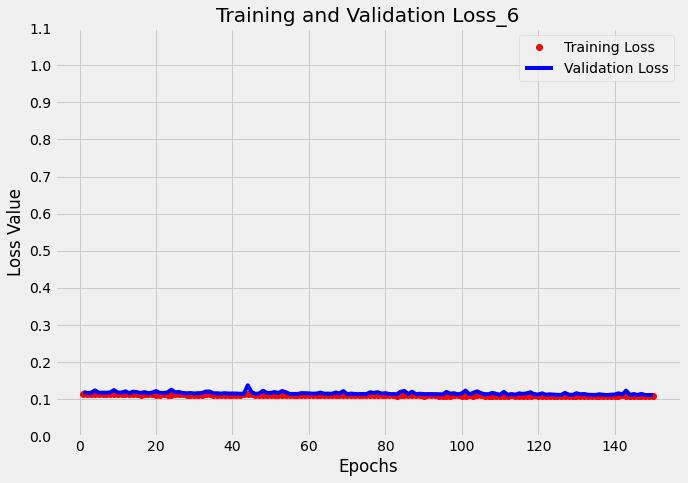

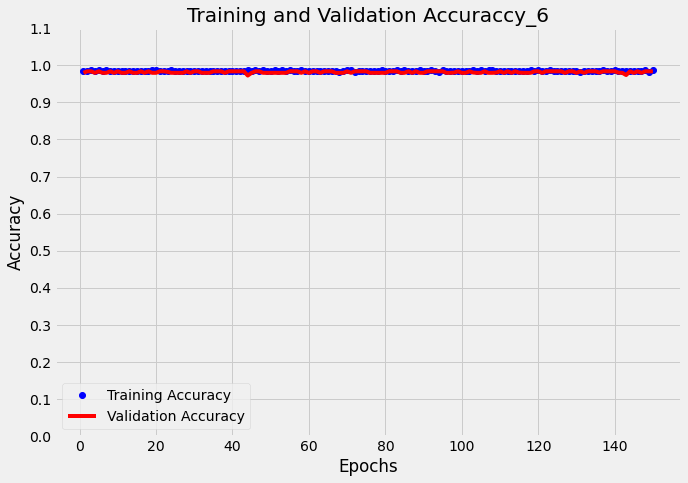

16/16 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9880
Splitting data 7.

HERERRR
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
<class 'numpy.ndarray'> ,(3054, 2), <class 'numpy.ndarray'> , (1505, 2)
<class 'numpy.ndarray'> ,(3054, 4), <class 'numpy.ndarray'>,(1505, 4)
Epoch 1/150
306/306 [==============================] - 1s 3ms/step - loss: 0.1083 - accuracy: 0.9856 - val_loss: 0.1134 - val_accuracy: 0.9794
Epoch 2/150
306/306 [==============================] - 1s 5ms/step - loss: 0.1083 - accuracy: 0.9843 - val_loss: 0.1121 - val_accuracy: 0.9794
Epoch 3/150
306/306 [==============================] - 1s 2ms/step - loss: 0.1072 - accuracy: 0.9843 - val_loss: 0.1110 - val_accuracy: 0.9834
Epoch 4/150
306/306 [==============================] - 1s 2ms/step - loss: 0.1081 - accuracy: 0.9876 - val_loss: 0.1109 - val_accuracy: 0.9834
Epoch 5/150
306/306 [==============================] - 1s 2ms/step - loss: 

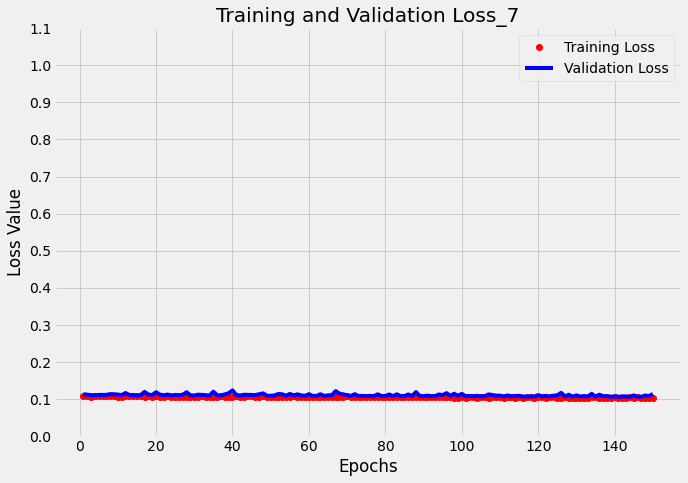

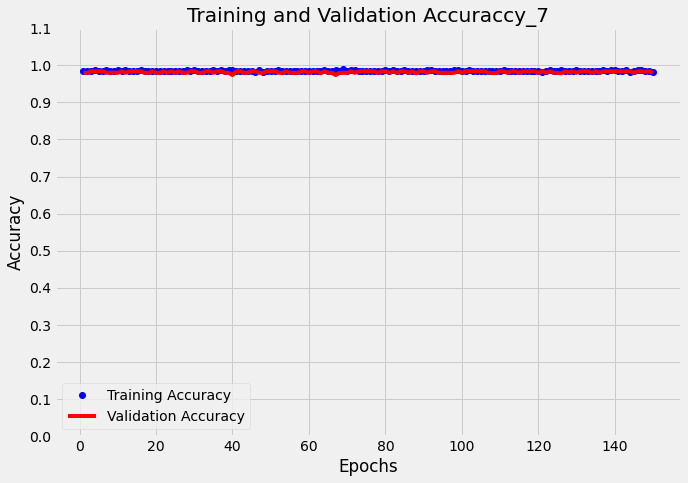

16/16 [==============================] - 0s 2ms/step - loss: 0.1050 - accuracy: 0.9820
Splitting data 8.

HERERRR
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
<class 'numpy.ndarray'> ,(3054, 2), <class 'numpy.ndarray'> , (1505, 2)
<class 'numpy.ndarray'> ,(3054, 4), <class 'numpy.ndarray'>,(1505, 4)
Epoch 1/150
306/306 [==============================] - 1s 3ms/step - loss: 0.1032 - accuracy: 0.9856 - val_loss: 0.1066 - val_accuracy: 0.9834
Epoch 2/150
306/306 [==============================] - 1s 3ms/step - loss: 0.1042 - accuracy: 0.9846 - val_loss: 0.1084 - val_accuracy: 0.9821
Epoch 3/150
306/306 [==============================] - 1s 2ms/step - loss: 0.1036 - accuracy: 0.9833 - val_loss: 0.1167 - val_accuracy: 0.9794
Epoch 4/150
306/306 [==============================] - 1s 2ms/step - loss: 0.1025 - accuracy: 0.9862 - val_loss: 0.1081 - val_accuracy: 0.9794
Epoch 5/150
306/306 [==============================] - 1s 2ms/step - loss: 

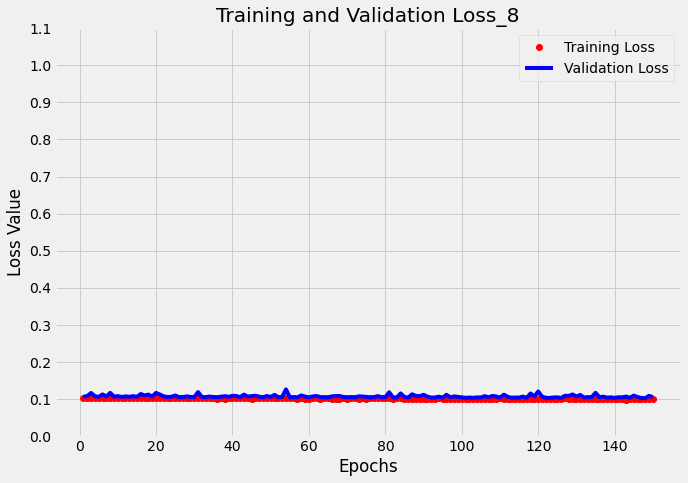

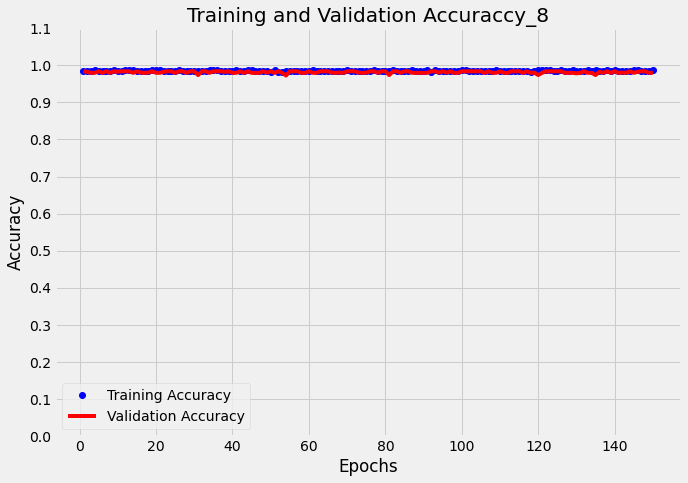

16/16 [==============================] - 0s 4ms/step - loss: 0.0994 - accuracy: 0.9820
Splitting data 9.

HERERRR
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
<class 'numpy.ndarray'> ,(3054, 2), <class 'numpy.ndarray'> , (1505, 2)
<class 'numpy.ndarray'> ,(3054, 4), <class 'numpy.ndarray'>,(1505, 4)
Epoch 1/150
306/306 [==============================] - 2s 6ms/step - loss: 0.1004 - accuracy: 0.9836 - val_loss: 0.1086 - val_accuracy: 0.9794
Epoch 2/150
306/306 [==============================] - 2s 5ms/step - loss: 0.1001 - accuracy: 0.9836 - val_loss: 0.1048 - val_accuracy: 0.9801
Epoch 3/150
306/306 [==============================] - 2s 5ms/step - loss: 0.0997 - accuracy: 0.9862 - val_loss: 0.1043 - val_accuracy: 0.9794
Epoch 4/150
306/306 [==============================] - 1s 5ms/step - loss: 0.0998 - accuracy: 0.9849 - val_loss: 0.1032 - val_accuracy: 0.9834
Epoch 5/150
306/306 [==============================] - 1s 3ms/step - loss: 

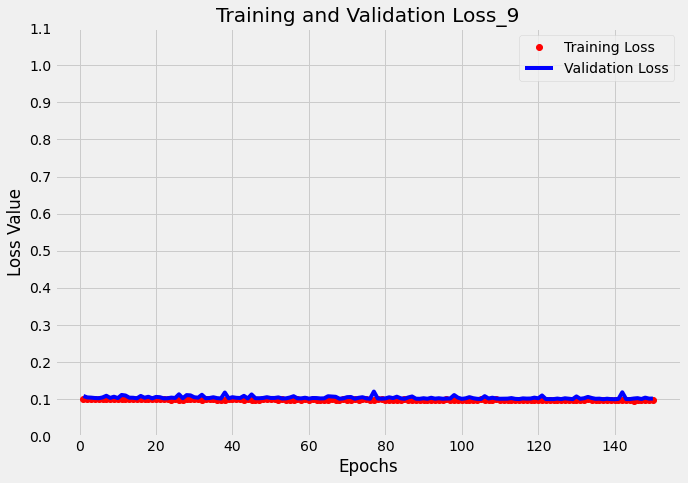

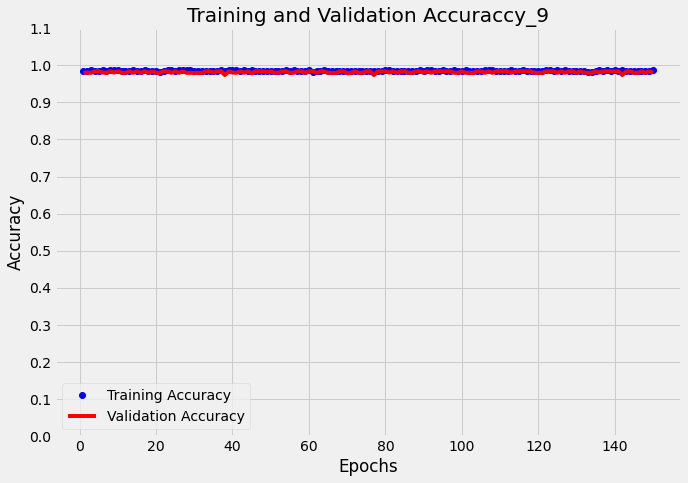

16/16 [==============================] - 0s 4ms/step - loss: 0.0964 - accuracy: 0.9820
Splitting data 10.

HERERRR
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
<class 'numpy.ndarray'> ,(3054, 2), <class 'numpy.ndarray'> , (1505, 2)
<class 'numpy.ndarray'> ,(3054, 4), <class 'numpy.ndarray'>,(1505, 4)
Epoch 1/150
306/306 [==============================] - 1s 4ms/step - loss: 0.0973 - accuracy: 0.9859 - val_loss: 0.1021 - val_accuracy: 0.9794
Epoch 2/150
306/306 [==============================] - 1s 3ms/step - loss: 0.0978 - accuracy: 0.9843 - val_loss: 0.1025 - val_accuracy: 0.9801
Epoch 3/150
306/306 [==============================] - 1s 2ms/step - loss: 0.0968 - accuracy: 0.9859 - val_loss: 0.1004 - val_accuracy: 0.9834
Epoch 4/150
306/306 [==============================] - 1s 3ms/step - loss: 0.0960 - accuracy: 0.9849 - val_loss: 0.1023 - val_accuracy: 0.9794
Epoch 5/150
306/306 [==============================] - 1s 3ms/step - loss:

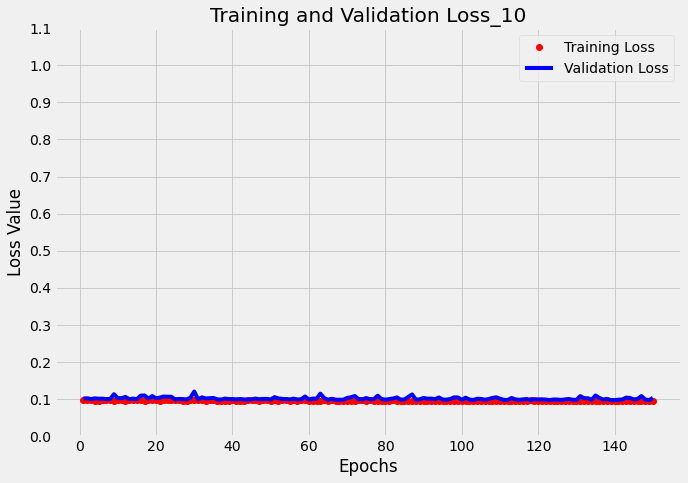

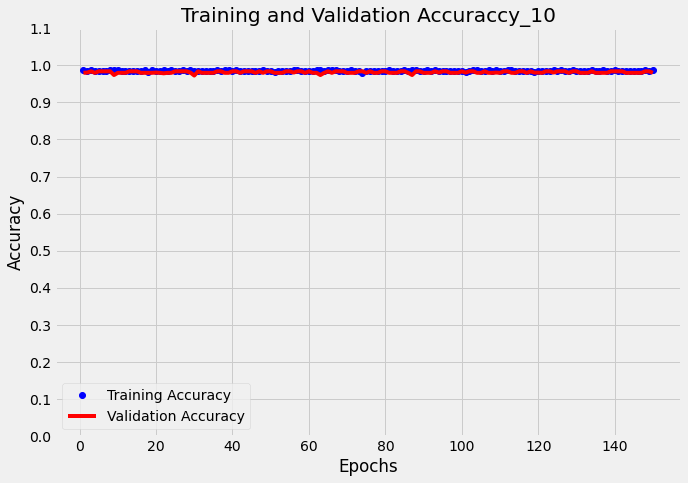

16/16 [==============================] - 0s 1ms/step - loss: 0.0964 - accuracy: 0.9820
{'loss': [0.19632074236869812, 0.15082861483097076, 0.13066279888153076, 0.12001330405473709, 0.11362811923027039, 0.10721346735954285, 0.10501258820295334, 0.09942376613616943, 0.0964093953371048, 0.09636738896369934], 'accuracy': [0.9879999756813049, 0.9879999756813049, 0.9879999756813049, 0.9819999933242798, 0.9879999756813049, 0.9879999756813049, 0.9819999933242798, 0.9819999933242798, 0.9819999933242798, 0.9819999933242798], 'true_classes': [array([3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 1, 2, 3, 3, 1, 3, 3, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 3, 3, 1, 2, 2, 3, 3, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2, 1, 2, 1, 2, 3, 3, 3, 1, 3,
       2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3], dtype=int64), array([1, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2, 1, 2, 1, 2, 2, 2, 3, 2, 2, 2,
       3, 3, 2, 2, 2, 1, 3, 3, 1, 2, 3,

In [26]:

# holds test data evaluation and predicted belt tension class 
cashe ={} # printing Average Loss and Accuracy

# reading trainiing data file
df_train= pd.read_csv("traningData_349.csv")
T_class = 3
epocs = 150
features= ['NNNormalized_Power','Normalized_Load']

# list contains number of hidden and output layer nodes
model_architecture = [10,10,6,4]
#if isinstance(split.get("TT_split"),tuple):
    
# build and compile model
model = NN_model(model_architecture)
    
"""
    For loop for getting average loss and accuracy
"""
for i in range(10):

    # spliting the data into train-test data 
    print(f'Splitting data {i+1}.\n')

    split = train_test(df_train,features,T_class)
    #X_train, X_test, y_train, y_test= split.get("TT_split")
    if isinstance(split.get("TT_split"),tuple):
        # fit model
        history = fit_model(model,split,i+1,epocs)

        # getting loss and accuracy for training and validation data
        history_dict = history.history
        print(history_dict.keys())

        # Plotting losses 
        plot_loss(history_dict,i+1)

        # Training and Validation Accuracy
        plot_accuracy(history_dict,i+1)

        res = prdict_Tension_class(model,i+1,features,T_class)


        if f'class_{T_class}' not in cashe:

            cashe[f'class_{T_class}'] = dict(
                            [('loss',[res[1]]), ('accuracy',[res[2]]),
                            ('true_classes',[res[3]]),('pred_classes', [res[4]]),
                             ('load',[res[5]]),('power',[res[6]])]
                             )
        else:
            temp = cashe.get(f'class_{T_class}')
            temp['loss'].append(res[1])
            temp['accuracy'].append(res[2])
            temp['true_classes'].append(res[3])
            temp['pred_classes'].append(res[4])
            temp['load'].append(res[5])
            temp['power'].append(res[6])
            #(T_class,results[0],results[1],True_label,pred,load,power)
    
    else:
        print(split.get("TT_split"))
        #print(prdict_Tension_class(1))
        
print(cashe.get(f'class_{T_class}'))

### Model Accuracy Plot

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (7.0, 5.0)

plt.scatter(np.arange(1,len(cashe.get('class_4')['accuracy'])+1),
           cashe.get('class_4')['accuracy'],label='Accuracy' )

plt.plot(5.5,np.sum((cashe.get('class_4')['accuracy']))/len(cashe.get('class_4')['accuracy']),
         marker='o', linestyle='none', markersize=10,color='k',label='Average Accuracy')
#plt.yticks(np.arange(0.978,0.987,0.001))
plt.xticks(np.arange(1, 11,1))
plt.title(f'Accuracy of Model on Test Data',color='#4390cb')
plt.xlabel('Number of Iterations',color='#4390cb')
plt.ylabel('Model Accuracy per Interation',color='#4390cb')
plt.legend(loc=1,bbox_to_anchor=(1.40,1))
plt.savefig(f'Model_1_Accuracy.png',bbox_inches='tight')

plt.show()

In [ ]:
plt.scatter(np.arange(1,len(cashe.get('class_4')['loss'])+1),
           cashe.get('class_4')['loss'],label='Loss per Iteration' )

plt.plot(5.5,np.sum((cashe.get('class_4')['loss']))/len(cashe.get('class_4')['loss']),
         marker='o', linestyle='none', markersize=10,color='k',label='Average Loss')
#plt.yticks(np.arange(0.059,0.133,0.01))
plt.xticks(np.arange(1, 11,1))
plt.title(f'Loss of Model on Test Data',color='#4390cb')
plt.xlabel('Number of Iterations',color='#4390cb')
plt.ylabel('Model Loss per Interation',color='#4390cb')
plt.legend(loc=1, bbox_to_anchor=(1,1))
plt.savefig(f'Model_1_Loss.png',bbox_inches='tight')
plt.show()